# Kaggle Competition Analysis
## *House Prices - Advanced Regression Techniques*
### *Predict sales prices and practice feature engineering, RFs, and gradient boosting*

## **Part 1: Collect data from Kaggle**

In [1]:
# Declare variable for latest api_token from kaggle account
creds = '{"username":"alexwurm","key":"b2d0aafea61e20ebb547c35b41428a1c"}'

In [2]:
# Find home directory
import os
root = os.path.expanduser('~')
root

'/Users/alexwurm'

In [3]:
if not os.path.exists(f'{root}/.kaggle'):
    ! mkdir ~/.kaggle
    ! touch ~/.kaggle/kaggle.json

In [4]:
# Overwrite the kaggle.json file with the latest authorization
import json
with open(f'{root}/.kaggle/kaggle.json','w') as auth_file:
    json.dump(creds, auth_file)

In [5]:
# Change permissions so the kaggle authentication file can be read from
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
# For remote server (e.g., Github Codespace) manually configure authentication details in the environment
x = json.loads(creds)

os.environ['KAGGLE_USERNAME'] = x['username']
os.environ['KAGGLE_KEY'] = x['key']

In [7]:
# Install kaggle library
! pip install kaggle

In [8]:
# Access the kaggle api to download the relevant competition data
! kaggle competitions download -c house-prices-advanced-regression-techniques

house-prices-advanced-regression-techniques.zip: Skipping, found more recently modified local copy (use --force to force download)


In [9]:
# Unzip the data
import zipfile
zipfile.ZipFile('./house-prices-advanced-regression-techniques.zip').extractall('./house-prices')

## **Part 2: View and Preprocess the data**

In [10]:
from pathlib import Path
path = Path('house-prices')

import pandas as pd

# Read in the train and test datasets
train = pd.read_csv(path/'train.csv')
test = pd.read_csv(path/'test.csv')

# Set visualization options for pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [20]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [11]:
# View all columns with corresponding types
for column in train.columns:
    print(f'{column}: {pd.api.types.infer_dtype(train[column])}')

Id: integer
MSSubClass: integer
MSZoning: string
LotFrontage: floating
LotArea: integer
Street: string
Alley: string
LotShape: string
LandContour: string
Utilities: string
LotConfig: string
LandSlope: string
Neighborhood: string
Condition1: string
Condition2: string
BldgType: string
HouseStyle: string
OverallQual: integer
OverallCond: integer
YearBuilt: integer
YearRemodAdd: integer
RoofStyle: string
RoofMatl: string
Exterior1st: string
Exterior2nd: string
MasVnrType: string
MasVnrArea: floating
ExterQual: string
ExterCond: string
Foundation: string
BsmtQual: string
BsmtCond: string
BsmtExposure: string
BsmtFinType1: string
BsmtFinSF1: integer
BsmtFinType2: string
BsmtFinSF2: integer
BsmtUnfSF: integer
TotalBsmtSF: integer
Heating: string
HeatingQC: string
CentralAir: string
Electrical: string
1stFlrSF: integer
2ndFlrSF: integer
LowQualFinSF: integer
GrLivArea: integer
BsmtFullBath: integer
BsmtHalfBath: integer
FullBath: integer
HalfBath: integer
BedroomAbvGr: integer
KitchenAbvGr: in

In [12]:
# Find fields with missing values
train.isna().sum().sort_values(ascending=False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
LotFrontage       259
GarageYrBlt        81
GarageCond         81
GarageType         81
GarageFinish       81
GarageQual         81
BsmtFinType2       38
BsmtExposure       38
BsmtQual           37
BsmtCond           37
BsmtFinType1       37
MasVnrArea          8
MasVnrType          8
Electrical          1
Id                  0
Functional          0
Fireplaces          0
KitchenQual         0
KitchenAbvGr        0
BedroomAbvGr        0
HalfBath            0
FullBath            0
BsmtHalfBath        0
TotRmsAbvGrd        0
GarageCars          0
GrLivArea           0
GarageArea          0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
BsmtFullBath        0
HeatingQC 

In [13]:
# Set the dependent variable to predict with any models
dep_var = 'SalePrice'

In [14]:
# Create TabularPandas object for training data
from fastai.tabular.all import *

procs = [Categorify, FillMissing, Normalize]
splits = RandomSplitter(valid_pct=0.2)(range_of(train))
cont, cat = cont_cat_split(train, 1, dep_var=dep_var)

# Manual adjustment, move 'Id' from continuous to categorical
cont.remove('Id')
cat.append('Id')

tp = TabularPandas(train, procs, cat, cont, y_names=dep_var, splits=splits)

tp.show(3)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,Id,LotFrontage_na,MasVnrArea_na,GarageYrBlt_na,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
1091,FV,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,Twnhs,2Story,Gable,CompShg,MetalSd,MetalSd,BrkFace,Gd,TA,PConc,Gd,TA,No,BLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,#na#,Detchd,Unf,TA,TA,Y,#na#,#na#,#na#,WD,Normal,1092,False,False,False,160.0,24.0,2160.0,7.0,5.0,1999.0,2000.0,212.0,510.0,0.0,90.0,600.0,624.0,628.0,0.0,1252.0,1.0,0.0,2.0,1.0,2.0,1.0,4.0,0.0,1999.0,2.0,462.0,0.0,48.0,0.0,0.0,0.0,-4.440892e-16,0.0,3.0,2008.0,160000
280,RL,Pave,#na#,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,2Story,Gable,CompShg,Plywood,Plywood,BrkFace,Gd,TA,CBlock,Gd,TA,Av,GLQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,TA,Attchd,Fin,TA,TA,Y,#na#,#na#,#na#,WD,Normal,281,False,False,False,60.0,82.0,11287.0,7.0,6.0,1989.0,1989.0,340.0,421.0,0.0,386.0,807.0,1175.0,807.0,0.0,1982.0,0.0,0.0,2.0,1.0,3.0,1.0,7.0,1.0,1989.0,2.0,575.0,0.0,84.0,0.0,196.0,0.0,-4.440892e-16,0.0,1.0,2007.0,228500
688,RL,Pave,#na#,Reg,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,#na#,#na#,#na#,New,Partial,689,False,False,False,20.0,60.0,8089.0,8.0,6.0,2007.0,2007.0,0.0,945.0,0.0,474.0,1419.0,1419.0,0.0,0.0,1419.0,1.0,0.0,2.0,0.0,2.0,1.0,7.0,1.0,2007.0,2.0,567.0,140.0,0.0,0.0,0.0,0.0,-4.440892e-16,0.0,10.0,2007.0,392000


In [15]:
# View underlying values for the TabularPandas object
tp.items.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_na,MasVnrArea_na,GarageYrBlt_na
1091,862,2.462638,2,-2.115619,-0.784095,2,2,4,4,1,5,1,22,3,3,4,6,0.651035,-0.507227,0.915128,0.731536,2,2,9,9,2,0.588535,3,5,3,3,4,4,2,0.159154,6,-0.283332,-1.101435,-1.102079,2,1,2,5,-1.422632,0.662387,-0.116936,-0.503509,1.106640,-0.236888,0.788044,1.255045,-1.047786,-0.200875,3,-1.560667,7,-0.955603,0,6,0.845344,3,0.302282,-0.051411,5,5,3,-0.731477,0.012412,-0.362783,-0.117106,-0.280307,-0.065035,0,0,0,-0.144019,-1.224129,0.134652,9,5,160000,1,1,1
280,228,0.089696,4,0.549420,0.064370,2,0,4,4,1,5,1,21,3,3,1,6,0.651035,0.391773,0.586811,0.203396,2,2,10,11,2,1.283589,3,5,2,3,4,1,3,-0.044826,6,-0.283332,-0.431216,-0.605913,2,3,2,5,0.030021,1.075657,-0.116936,0.919949,-0.828323,-0.236888,0.788044,1.255045,0.167521,-0.200875,3,0.303832,7,0.605438,5,2,0.440024,1,0.302282,0.476554,5,5,3,-0.731477,0.551566,-0.362783,6.391492,-0.280307,-0.065035,0,0,0,-0.144019,-1.955475,-0.621470,9,5,228500,1,1,1
688,546,-0.859480,4,-0.461457,-0.232923,2,0,4,2,1,5,1,23,3,3,1,3,1.374545,0.391773,1.177781,1.067624,2,2,9,9,2,-0.562649,3,5,3,3,4,1,3,1.156131,6,-0.283332,-0.231962,0.861010,2,1,2,5,0.673301,-0.787520,-0.116936,-0.177869,1.106640,-0.236888,0.788044,-0.747540,-1.047786,-0.200875,3,0.303832,7,0.605438,3,2,1.169600,2,0.302282,0.439176,5,5,3,0.386813,-0.706460,-0.362783,-0.117106,-0.280307,-0.065035,0,0,0,-0.144019,1.335584,-0.621470,7,6,392000,1,1,1


In [16]:
save_pickle('tp.pkl', tp)

In [22]:
len(tp.train), len(tp.valid)

(1168, 292)

## **Part 3: Create a single Decision Tree**


In [23]:
tp = load_pickle('tp.pkl')

In [24]:
xs, y = tp.train.xs, tp.train.y
valid_xs, valid_y = tp.valid.xs, tp.valid.y

In [25]:
from sklearn.tree import DecisionTreeRegressor

m = DecisionTreeRegressor(max_leaf_nodes=4)
m.fit(xs, y);

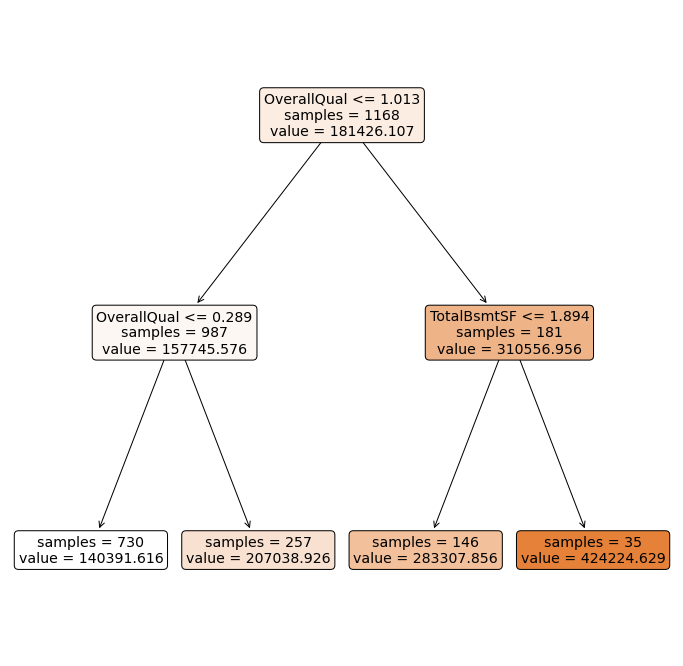

In [28]:
from sklearn.tree import *
import matplotlib.pyplot as plt

# Get feature names and class names to plot decision tree
fn = tp.x_names
cn = ['SalePrice']

# Plot the decision tree
plt.figure(figsize=(12,12))
plot_tree(m, feature_names=fn, class_names=cn, filled=True, impurity=False, rounded=True);

In [31]:
# Complete the following steps
# 1. Import dtreeviz
# 2. Create a viz_model object with the decision tree regressor model
# 3. Display the decision tree

# 1. Import dtreeviz
import dtreeviz

# 2. Create a viz_model object with the decision tree regressor model
viz_model = dtreeviz.model(m, xs, y, feature_names=fn, class_names=cn)

# 3. Display the decision tree
v = viz_model.view()
v.show()
v.save('decision_tree.svg')

/Users/alexwurm/.pyenv/versions/3.10.3/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names


In [32]:
# Build a bigger decision tree
m = DecisionTreeRegressor()
m.fit(xs, y);

In [33]:
# Define a root-mean-squared-error function
def r_mse(pred, y):
    return round(math.sqrt(((pred-y)**2).mean()), 4)

# Define a model root-mean-squared-error function
def m_r_mse(m, xs, y):
    return r_mse(m.predict(xs), y)


In [34]:

# Calculate the root-mean-squared-error for the training data
m_r_mse(m, xs, y)

0.0

In [35]:
# Calculate the root-mean-squared-error for the validation data
m_r_mse(m, valid_xs, valid_y)

49070.7787

In [36]:
# Investigate potential overfitting
m.get_n_leaves(), len(xs)

(1124, 1168)

In [42]:
min_records = 20

# Make a new model where each leaf node contains at least min_records
m = DecisionTreeRegressor(min_samples_leaf=min_records)
m.fit(xs, y);

# Calculate the root-mean-squared-error for the training data and validation data
m_r_mse(m, xs, y), m_r_mse(m, valid_xs, valid_y)

(33446.936, 38554.3126)

In [43]:
# Check the number of leaf nodes of the new model
m.get_n_leaves()

45

In [ ]:
## **Part 4: Create a Random Forest**